# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath ='/home/ex5/21MIS1174/MultipleReg.csv'

# Using pandas library it enables us to read the csv file and store as a dataframe

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe 

In [3]:
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,target
0,5,164,99.800003,176.600006,66.199997,54.299999,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,5,164,99.400002,176.600006,66.400002,54.299999,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,4,158,105.800003,192.699997,71.400002,55.700001,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,4,158,105.800003,192.699997,71.400002,55.900002,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,5,192,101.199997,176.800003,64.800003,54.299999,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset

In [4]:
data.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
target               0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used

In [5]:
data.dtypes

symboling              int64
normalized-losses      int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
target                 int64
dtype: object

# It is advisable to first find the correlation between features and target.. Higher the correlation coefficient better the Multiple Linear Regression analysis

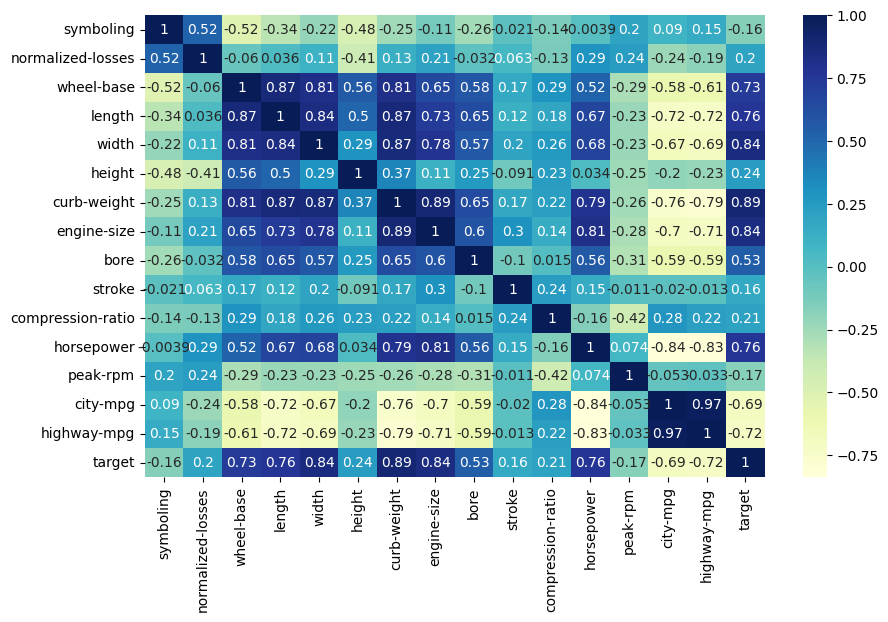

In [6]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# sns.heatmap(x_selected.corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# As per the dataset 8 features are not deemed to be set as features as they have less correlation values with target variable... So it is better to drop them from the dataframe

In [7]:
# Drop additional columns
columns_to_drop = ['symboling', 'normalized-losses', 'height', 'stroke', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg']
x_selected = data.drop(columns=columns_to_drop, axis=1)
x_selected

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,target
0,99.800003,176.600006,66.199997,2337,109,3.19,102,13950
1,99.400002,176.600006,66.400002,2824,136,3.19,115,17450
2,105.800003,192.699997,71.400002,2844,136,3.19,110,17710
3,105.800003,192.699997,71.400002,3086,131,3.13,140,23875
4,101.199997,176.800003,64.800003,2395,108,3.50,101,16430
...,...,...,...,...,...,...,...,...
154,109.099998,188.800003,68.900002,2952,141,3.78,114,16845
155,109.099998,188.800003,68.800003,3049,141,3.78,160,19045
156,109.099998,188.800003,68.900002,3012,173,3.58,134,21485
157,109.099998,188.800003,68.900002,3217,145,3.01,106,22470


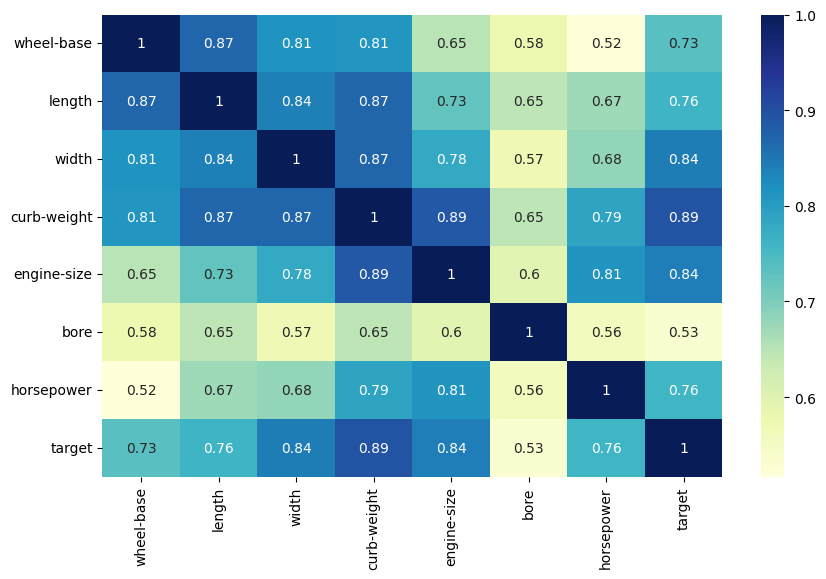

In [8]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(x_selected.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Using the scatter plot between highest feature correlation curb-weight and target varible to check whether Multiple Linear Regression is feasible.. curb-weight and target have a correlation of 89 %

<Axes: xlabel='curb-weight', ylabel='target'>

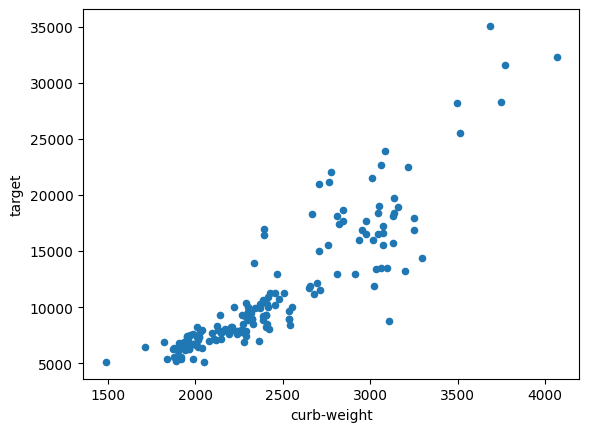

In [9]:
# Visualise the relationship between the features and the response using scatterplots
x_selected.plot(x='curb-weight',y='target',kind='scatter')

# Here 'x' represents the independent variable (feature) and 'y' represents the dependent variable (target)

In [10]:
x = x_selected.iloc[:, 0:-1].values
y = x_selected.iloc[:, -1].values

# Since only one feature is being used so the size has to be increased by one more dimension using 'reshape'

In [11]:
x.shape

(159, 7)

In [12]:
y.shape

(159,)

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 80:20 where 80 represents training set and 20 testing/validating set

In [13]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)  

# To check the dimensions of each training and testing set

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(127, 7)
(127,)
(32, 7)
(32,)


# Importing LinearRegression from 'sklearn' library and using the object to train the model on training set

In [15]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit() now impose Multiple Linear Regression
lr.fit(x_train, y_train)

LinearRegression()

# One of the most important in Multiple Linear Regression model is the equation of line, i.e., y = mx + c, where m is the slope of the line and c is intercept on the y - axis

In [16]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-64839.22113786733
[  154.88809286   -55.05492444   886.17284651     5.12840424
    32.2589798  -2018.86434749    26.02111432]


# The equation of line hence is :-

# y = 154.8881 * wheel-base - 55.0549 * length + 886.1728 * width + 5.1284 * curb-weight + 32.2589 * engine-size - 2018.8643 * bore + 26.0211 * horsepower - 64839.2211

# where y is TARGET and x are FEATURES (training set)

# Using the scatter plot we plot the points of one of the feature v target

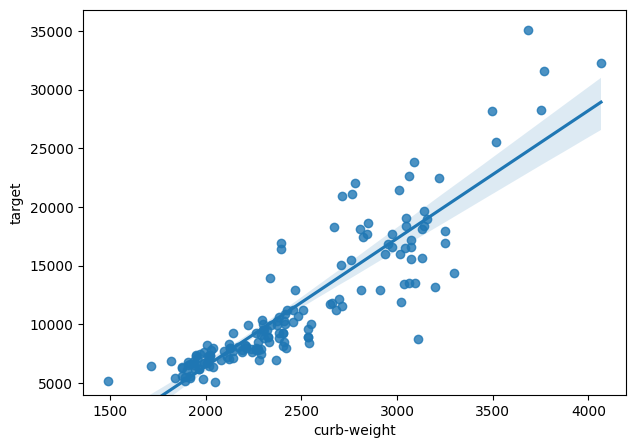

In [17]:
plt.figure(figsize = (7,5))

# Plotting the scatter plot of curb-weight v target
sns.regplot(x='curb-weight',y='target',data=x_selected)
plt.ylim(4000,)

# Display the plot
plt.show()

# Predict the set of values on x_test and x_train and store in corresponding variables

In [18]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# To verify the accuracy of the model we use Mean Squared Error and R² value which gives the goodness of fit, i.e., how close values are to the line and how much deviation of predicted from actual

In [19]:
# The model accuracy of test data
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)
print('Mean Squared Error : ', mse)
print('R² Value : ', r_squared)


Mean Squared Error :  6448622.182815665
R² Value :  0.8296223604246543


In [20]:
print('Train Score: ', lr.score(x_train, y_train))  
print('Test Score: ', lr.score(x_test, y_test))  

Train Score:  0.8393176380989857
Test Score:  0.8296223604246543


In [21]:
y_test.shape

(32,)

In [22]:
y_pred_test.shape

(32,)

# Mean Squared Error is 6448622.1828

# R² value is 82.962 % (values are approx 83 % near to the line)

# Based on mean squared value and R² value we already know that values are a bit distorted, with the help of graph we plot Actual vs Predicted to understand how the values vary

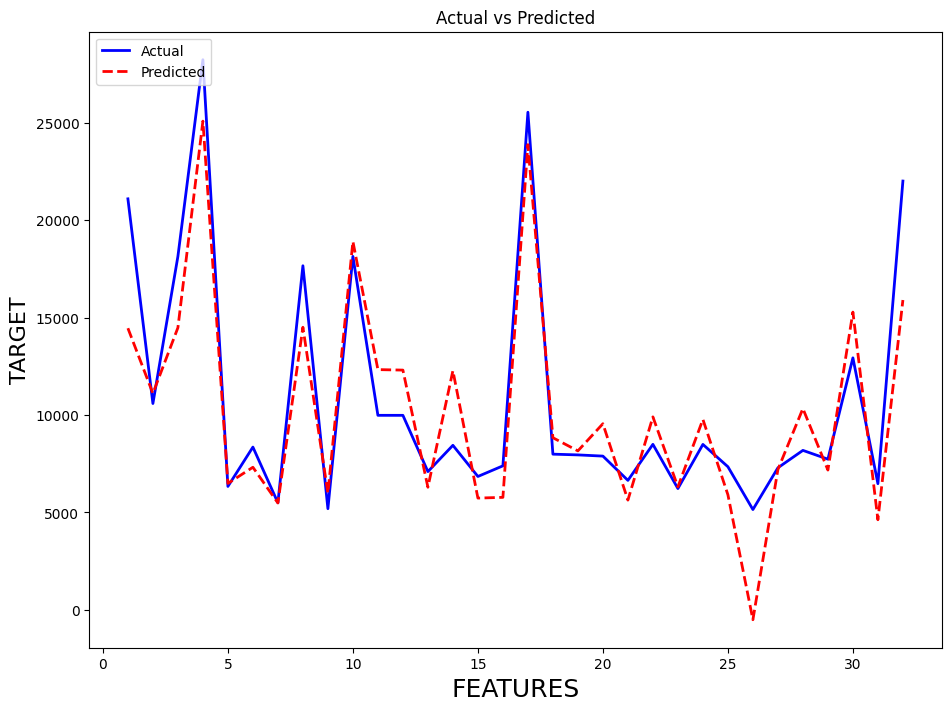

In [23]:
# Assuming you have already defined y_test and y_pred_test
c = [i for i in range(1, len(y_test)+1, 1)]  # generating index
fig = plt.figure(figsize=(11, 8))
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
plt.plot(c, y_pred_test, color="red", linewidth=2, linestyle="--", label='Predicted')
plt.title('Actual vs Predicted')                         # Plot heading
plt.xlabel('FEATURES', fontsize=18)              # X-label
plt.ylabel('TARGET', fontsize=16)               # Y-label
plt.legend(loc='upper left')
plt.show()

# We plot whatever values differ as we already know Actual vs Predicted don't match with good accuracy

Text(0, 0.5, 'ytest-ypred')

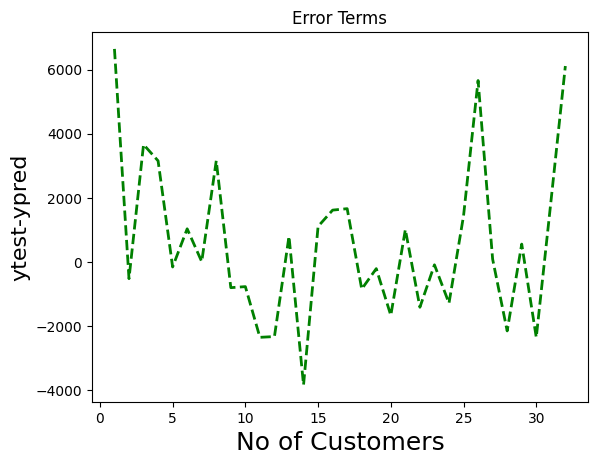

In [24]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_test, color="green", linewidth=2, linestyle="--")
plt.title('Error Terms') 
plt.xlabel('No of Customers', fontsize=18)            # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

# We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), the residuals are following the normally distributed with a mean 0.

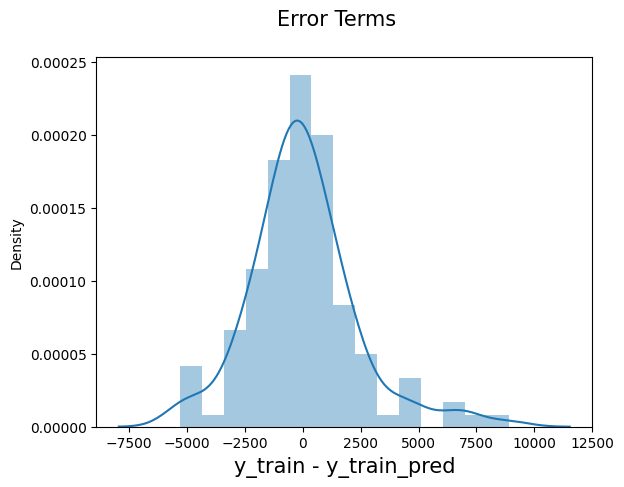

In [25]:
res = (y_train - y_pred_train)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

# Final Interpretation 

The dataset contains 160 rows and 16 columns is used for Linear Regression model. The dataset is not used as a whole and only specific features are interlinked to the target values. Since no empty or null values are present in the dataset, and Correlation between one of the feature and target is 89 %. Based on 80:20 validating split, R² value is 82.962 % and Mean Squared Error is 6448622.1828. From the line y = mx + c, we get the value of slope, i.e., m and value of intercept on y-axis, i.e., c. The model has quite a few uncertainities but still it is decent to predict the values.